# Bibliotheken importieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Daten einlesen und überblick über die Daten

In [2]:
df = pd.read_csv('C:/Users/kuimi/Documents/Master_Freiberg/Formation_Professionnelle/Data Sciences/Code_Souces/Projets_Portfolio/Regression_Marketing/Advertising_Budget_and_sales.csv')
df.shape

(200, 5)

In [3]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Prüfung auf fehlende Werte

In [6]:
print("Fehlende Werte pro Spalte:")
df.isnull().sum().sort_values(ascending=False)

Fehlende Werte pro Spalte:


Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

# Explorative Analyse

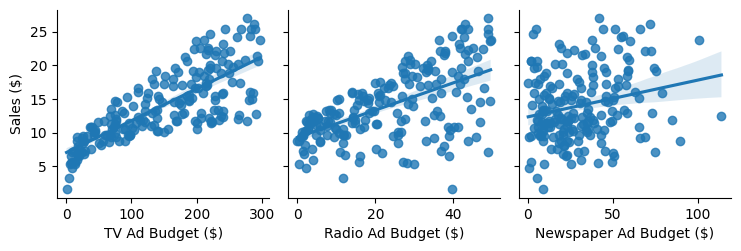

                         Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
Unnamed: 0                 1.000000          0.017715            -0.110680   
TV Ad Budget ($)           0.017715          1.000000             0.054809   
Radio Ad Budget ($)       -0.110680          0.054809             1.000000   
Newspaper Ad Budget ($)   -0.154944          0.056648             0.354104   
Sales ($)                 -0.051616          0.782224             0.576223   

                         Newspaper Ad Budget ($)  Sales ($)  
Unnamed: 0                             -0.154944  -0.051616  
TV Ad Budget ($)                        0.056648   0.782224  
Radio Ad Budget ($)                     0.354104   0.576223  
Newspaper Ad Budget ($)                 1.000000   0.228299  
Sales ($)                               0.228299   1.000000  


In [8]:
sns.pairplot(
    df,
    x_vars=['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)'],
    y_vars='Sales ($)',
    kind='reg'
)
plt.show()
print(df.corr())

# Modellierung und Bewertung des modells

In [9]:
X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = df['Sales ($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return rmse, r2

# Modelltraining

In [10]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor()
}
results = {}
for name, model in models.items():
    rmse, r2 = evaluate_model(model)
    results[name] = {"RMSE": rmse, "R2": r2}

results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print(results_df)

                      RMSE        R2
RandomForest      0.704569  0.984272
XGBoost           0.932166  0.972470
AdaBoost          1.035365  0.966037
Lasso             1.773046  0.900401
ElasticNet        1.776959  0.899961
Ridge             1.781599  0.899438
LinearRegression  1.781600  0.899438


# Speichern des besten Modells

In [11]:
import os
os.makedirs("model", exist_ok=True)
best_model = XGBRegressor()
best_model.fit(X_train, y_train)
joblib.dump(best_model, "model/best_model.joblib")

['model/best_model.joblib']